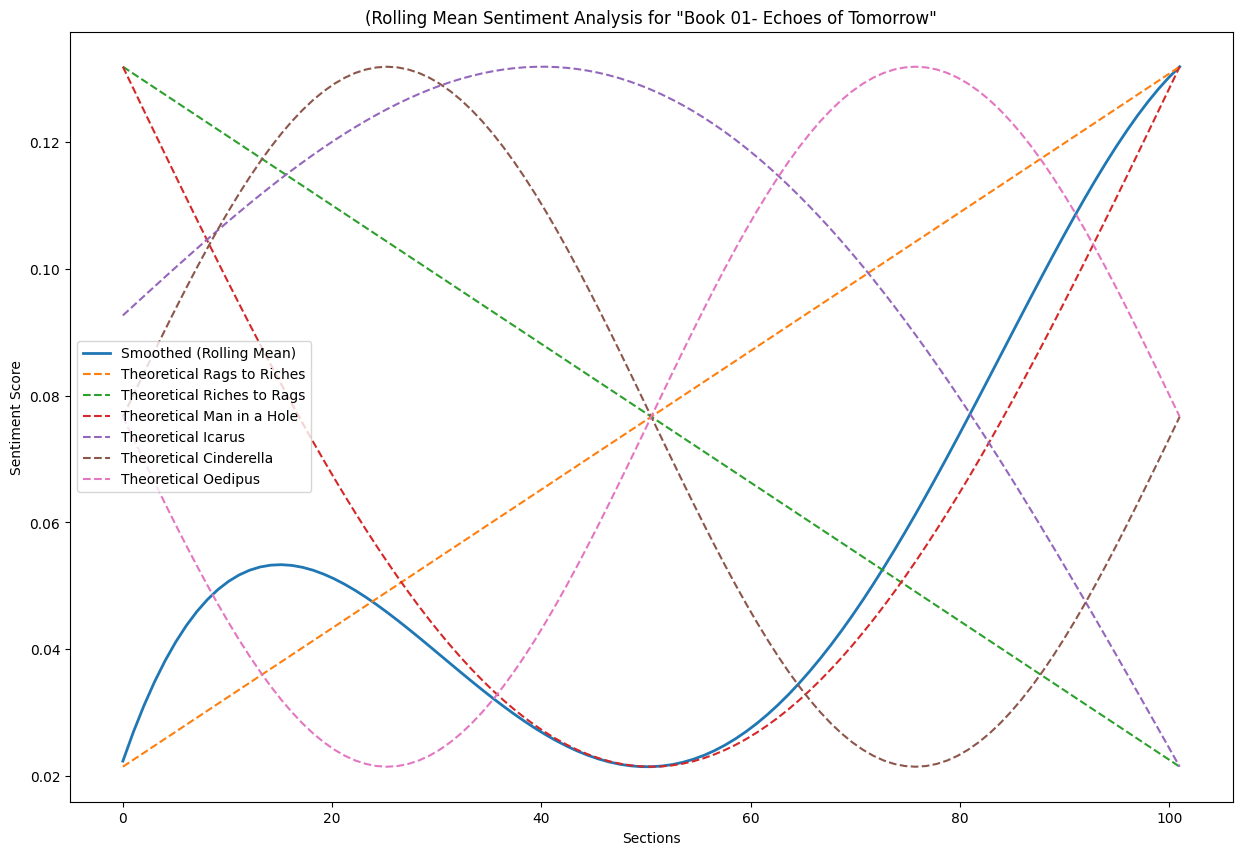

Final matching percentage for Rags to Riches: 40.45%
Final matching percentage for Riches to Rags: 14.45%
Final matching percentage for Man in a Hole: 47.07%
Final matching percentage for Icarus: 3.26%
Final matching percentage for Cinderella: 14.60%
Final matching percentage for Oedipus: 26.36%
The pattern with the highest matching percentage is 'Man in a Hole' with a percentage of 47.07%.


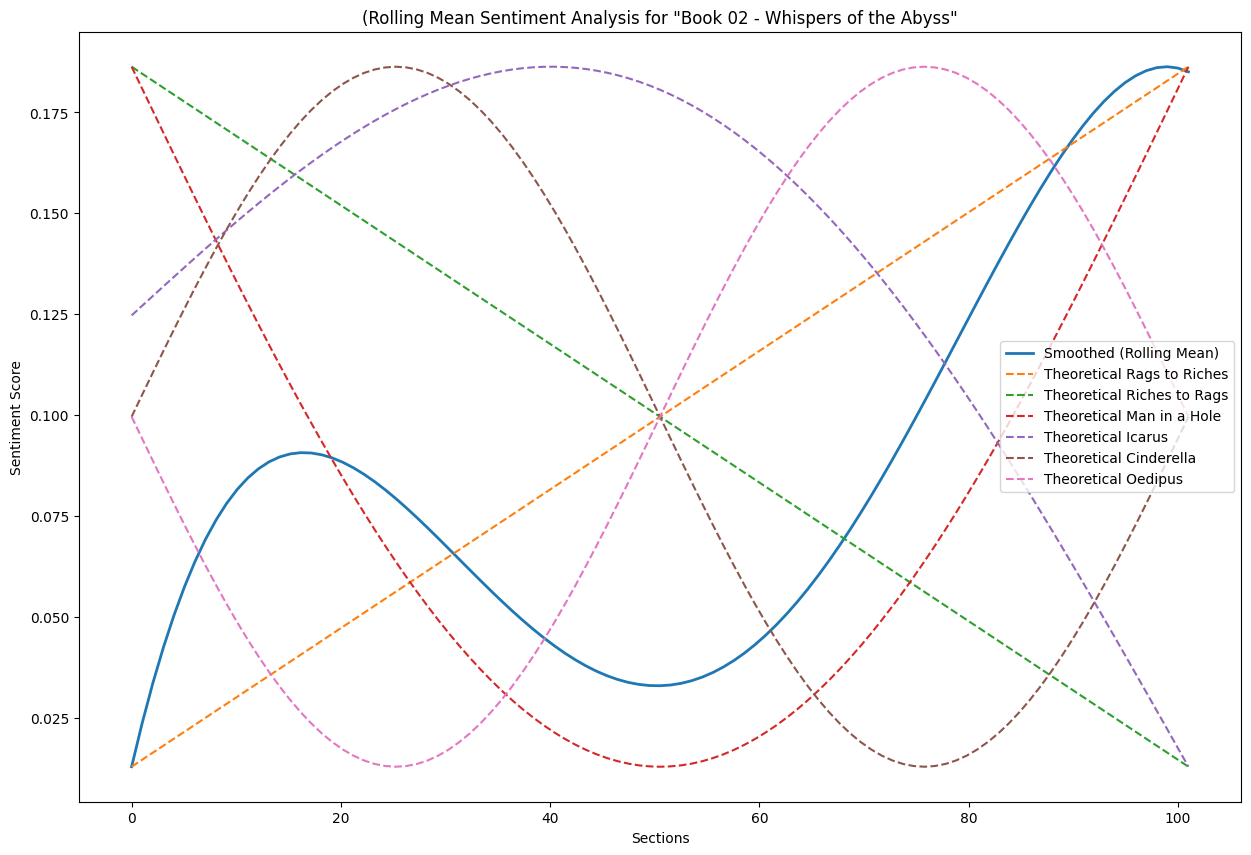

Final matching percentage for Rags to Riches: 48.00%
Final matching percentage for Riches to Rags: 12.88%
Final matching percentage for Man in a Hole: 45.76%
Final matching percentage for Icarus: 3.26%
Final matching percentage for Cinderella: 13.11%
Final matching percentage for Oedipus: 29.22%
The pattern with the highest matching percentage is 'Rags to Riches' with a percentage of 48.00%.


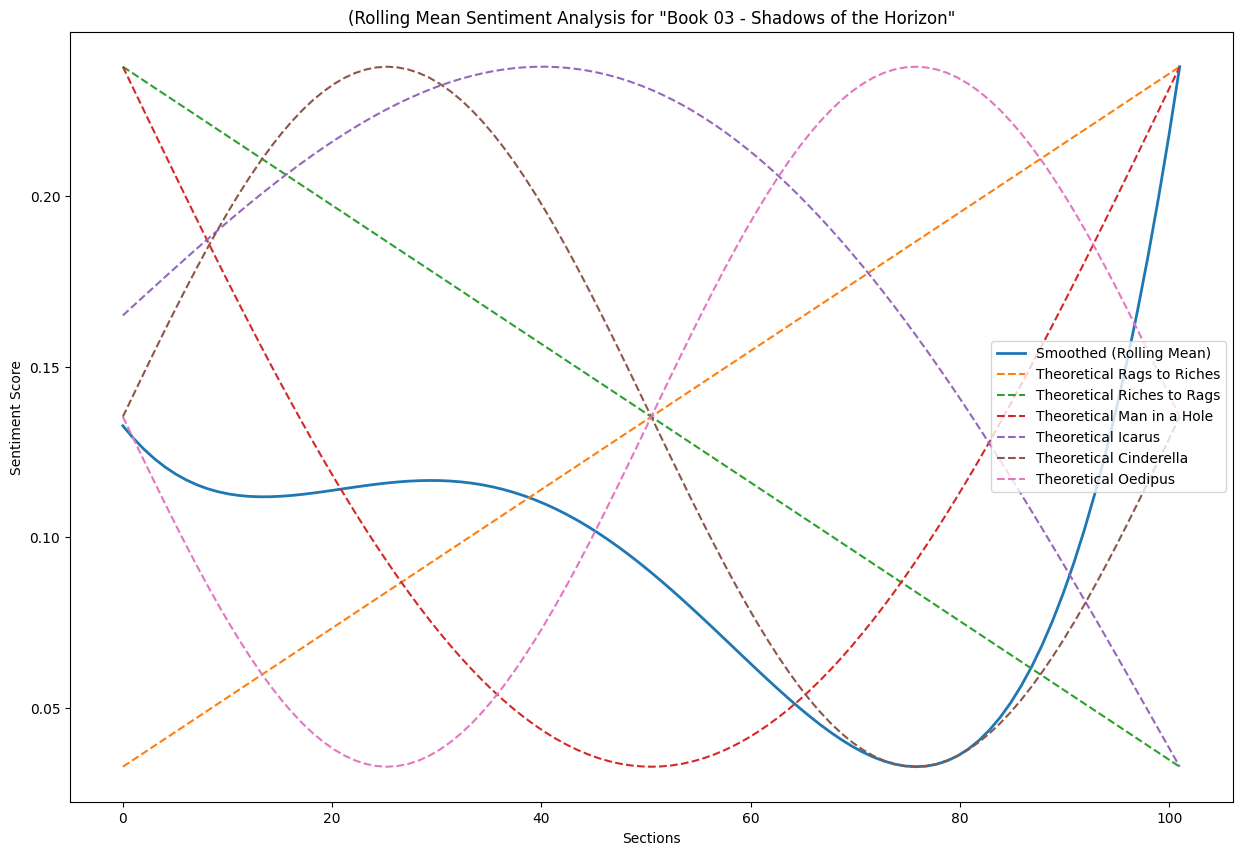

Final matching percentage for Rags to Riches: 20.06%
Final matching percentage for Riches to Rags: 30.63%
Final matching percentage for Man in a Hole: 44.36%
Final matching percentage for Icarus: 3.26%
Final matching percentage for Cinderella: 39.93%
Final matching percentage for Oedipus: 5.50%
The pattern with the highest matching percentage is 'Man in a Hole' with a percentage of 44.36%.


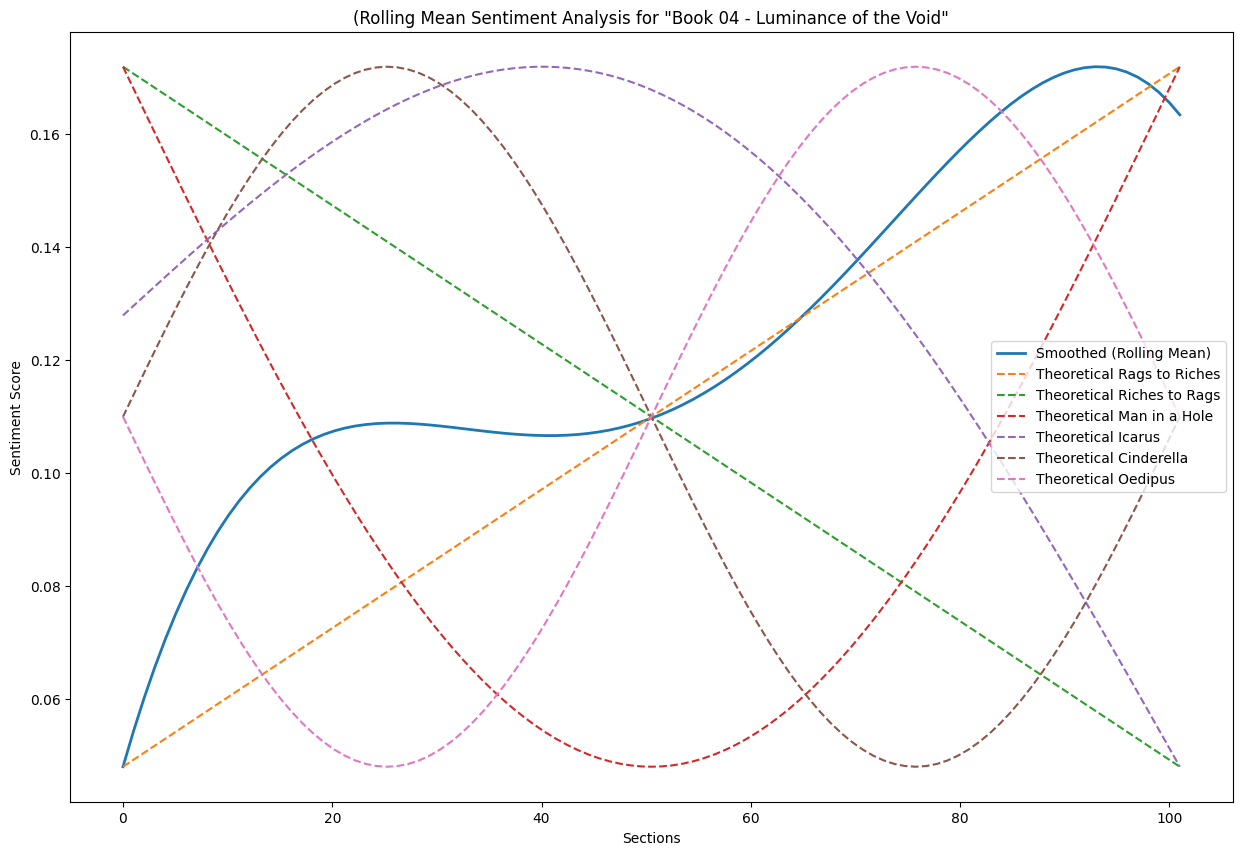

Final matching percentage for Rags to Riches: 55.07%
Final matching percentage for Riches to Rags: 3.27%
Final matching percentage for Man in a Hole: 12.77%
Final matching percentage for Icarus: 7.02%
Final matching percentage for Cinderella: 3.26%
Final matching percentage for Oedipus: 35.96%
The pattern with the highest matching percentage is 'Rags to Riches' with a percentage of 55.07%.


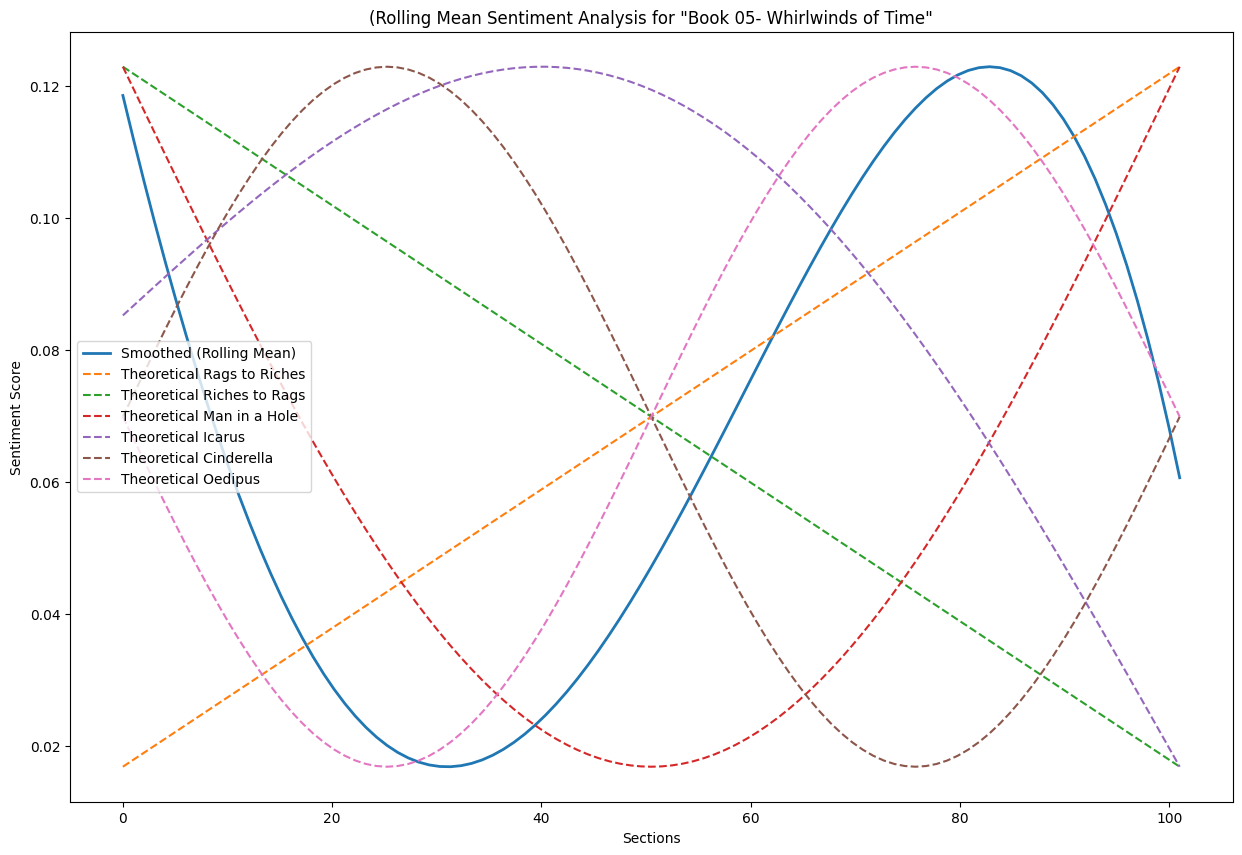

Final matching percentage for Rags to Riches: 38.14%
Final matching percentage for Riches to Rags: 10.74%
Final matching percentage for Man in a Hole: 29.20%
Final matching percentage for Icarus: 6.45%
Final matching percentage for Cinderella: 3.26%
Final matching percentage for Oedipus: 54.29%
The pattern with the highest matching percentage is 'Oedipus' with a percentage of 54.29%.


In [3]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
import requests
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import pearsonr
from statsmodels.nonparametric.smoothers_lowess import lowess

# Define the Gutendex API endpoint and parameters

book_file_names = [
    "Book 01- Echoes of Tomorrow.txt",
    "Book 02 - Whispers of the Abyss.txt",
    "Book 03 - Shadows of the Horizon.txt",
    "Book 04 - Luminance of the Void.txt",
    "Book 05- Whirlwinds of Time.txt",
    # Add more book file names as needed
]
# Load and preprocess text files
def preprocess_text(text):
    # Perform any necessary preprocessing steps here (e.g., lowercasing, removing punctuation, etc.)
    return text

# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Divide texts into sections
num_sections = 140

# Function to fetch book text using the Gutendex API
def read_and_preprocess_file(file_name):
    try:
        with open(file_name, 'r', encoding='utf-8', errors='replace') as f:
            text = f.read()
            return text  # Apply any preprocessing here if needed
    except FileNotFoundError:
        print(f"Failed to find file {file_name}")
    except Exception as e:
        print(f"An error occurred: {e}")


# Get all book IDs
def normalize_pattern(pattern):
    min_val = min(pattern)
    max_val = max(pattern)
    return [(x - min_val) / (max_val - min_val) for x in pattern]
def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))
def calculate_pearson_correlation(y_true, y_pred):
    corr, _ = pearsonr(y_true, y_pred)
    return corr    


def generate_theoretical_pattern(pattern_type, length):
    x = np.linspace(0, length, length)
    if pattern_type == 'Rags to Riches':
        return x / length
    elif pattern_type == 'Riches to Rags':
        return 1 - x / length
    elif pattern_type == 'Man in a Hole':
        return -np.sin((x / length) * np.pi)
    elif pattern_type == 'Icarus':
        return np.sin((x / length) * np.pi) - x / length
    elif pattern_type == 'Cinderella':
        return np.sin((x / length) * 2 * np.pi)
    elif pattern_type == 'Oedipus':
        return -np.sin((x / length) * 2 * np.pi)
        
def detect_patterns_and_percentages(y_smooth):
    detected_patterns = []
    matching_percentages = {}
    
    one_third = len(y_smooth) // 3
    first_part = y_smooth[:one_third]
    second_part = y_smooth[one_third:2*one_third]
    third_part = y_smooth[2*one_third:]
    
    first_slope = np.mean(np.diff(first_part))
    second_slope = np.mean(np.diff(second_part))
    third_slope = np.mean(np.diff(third_part))
    
    total_score = 0

    def add_pattern(name, score):
        nonlocal total_score
        detected_patterns.append(name)
        matching_percentages[name] = score
        total_score += score

    if first_slope < 0 and second_slope > 0 and third_slope > 0:
        add_pattern("Rags to Riches", 100)

    if first_slope > 0 and second_slope < 0 and third_slope < 0:
        add_pattern("Riches to Rags", 90)
        
    if first_slope > 0 and second_slope < 0 and third_slope > 0:
        add_pattern("Man in a Hole", 80)
        
    if first_slope < 0 and second_slope > 0 and third_slope < 0:
        add_pattern("Icarus", 70)
        
    if first_slope < 0 and second_slope > 0 and third_slope > 0 and third_slope < second_slope:
        add_pattern("Cinderella", 60)
        
    if first_slope > 0 and second_slope < 0 and third_slope < 0 and third_slope > second_slope:
        add_pattern("Oedipus", 50)
    
    # Normalize the scores to get percentages
    for name in detected_patterns:
        matching_percentages[name] = (matching_percentages[name] / total_score) * 100

    return detected_patterns, matching_percentages

def scale_theoretical_pattern(y_theoretical, y_min, y_max):
    return y_min + (y_theoretical - np.min(y_theoretical)) * (y_max - y_min) / (np.max(y_theoretical) - np.min(y_theoretical))
def calculate_penalty_percentage(min_val, max_val, actual_val, penalty_factor, lower_cap=20, upper_cap=90):
    percentage = ((max_val - actual_val) / (max_val - min_val + penalty_factor)) * upper_cap
    return max(lower_cap, min(upper_cap, percentage))
rmse_penalty_factor = 0.01
corr_penalty_factor = 0.01


# Create sentiment analysis charts with smoothed curve lines for each book
for i, book_file_name in enumerate(book_file_names):
    text = read_and_preprocess_file(book_file_name)
    if text is None:
        continue
    highest_percentage = 0
    highest_pattern = None 
    preprocessed_text = text  # Replace with actual preprocessing
    num_sections = 100  # Number of sections for sentiment analysis
    section_size = len(preprocessed_text) // num_sections
    sections = [preprocessed_text[i:i + section_size] for i in range(0, len(preprocessed_text), section_size)]
    book_title = book_file_name.split('.')[0] 

  
    # Sentiment analysis
    y = [TextBlob(section).sentiment.polarity for section in sections]
    x = np.linspace(0, len(sections), len(sections))

    # Using Rolling Mean
    y_series = pd.Series(y)
    window_size = 5
    y_rolling_mean = y_series.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill').to_numpy()

    # Polynomial curve fitting to the rolling mean
    poly_degree = 4  # Degree of the polynomial, can be changed
    coeffs = np.polyfit(x, y_rolling_mean, poly_degree)
    poly_eq = np.poly1d(coeffs)
    y_smooth = poly_eq(x)

   
    # Get min and max of smoothed curve to scale theoretical patterns
    y_min = np.min(y_smooth)
    y_max = np.max(y_smooth)

    # RMSE and Correlation calculations
    rmse_values = {}
    correlation_values = {}
   
    # Plotting
    plt.figure(figsize=(15, 10))
    plt.plot(x, y_smooth, label='Smoothed (Rolling Mean)', linewidth=2)
    
    theoretical_patterns = ['Rags to Riches', 'Riches to Rags', 'Man in a Hole', 'Icarus', 'Cinderella', 'Oedipus']
    normalized_rmse = {pattern: (rmse - min_rmse) / (max_rmse - min_rmse) for pattern, rmse in rmse_values.items()}
    normalized_corr = {pattern: (max_corr - corr) / (max_corr - min_corr) for pattern, corr in correlation_values.items()}
    
    for pattern in theoretical_patterns:
        theoretical_curve = generate_theoretical_pattern(pattern, len(x))
        scaled_theoretical_curve = scale_theoretical_pattern(theoretical_curve, y_min, y_max)
       
        rmse = calculate_rmse(y_smooth, scaled_theoretical_curve)
        corr = calculate_pearson_correlation(y_smooth, scaled_theoretical_curve)
        
        rmse_values[pattern] = rmse
        correlation_values[pattern] = corr

        plt.plot(x, scaled_theoretical_curve, label=f'Theoretical {pattern}', linestyle='--')
 
    plt.xlabel('Sections')
    plt.ylabel('Sentiment Score')
    plt.title(f'(Rolling Mean Sentiment Analysis for "{book_title}"')
    plt.legend()
    plt.show()

    # Calculate matching percentages
    min_rmse = min(rmse_values.values())
    max_rmse = max(rmse_values.values())

    min_corr = min(correlation_values.values())
    max_corr = max(correlation_values.values())

    for pattern in theoretical_patterns:
        rmse_percentage = calculate_penalty_percentage(min_rmse, max_rmse, rmse_values[pattern], rmse_penalty_factor, lower_cap=2.38, upper_cap=80)
        corr_percentage = calculate_penalty_percentage(min_corr, max_corr, 1 - correlation_values[pattern], corr_penalty_factor, lower_cap=4.58, upper_cap=80)
        rmse_weight = 0.6
        corr_weight = 0.4
 
        
        final_percentage = (rmse_weight * rmse_percentage) + (corr_weight * corr_percentage)
        if final_percentage > highest_percentage:
            
            highest_percentage = final_percentage
            highest_pattern = pattern
            
        print(f"Final matching percentage for {pattern}: {final_percentage:.2f}%")
    print(f"The pattern with the highest matching percentage is '{highest_pattern}' with a percentage of {highest_percentage:.2f}%.")